In [1]:
import mdsine2 as md2
from mdsine2.names import STRNAMES
import matplotlib.pyplot as plt; plt.rc('font', size=14)
from matplotlib.colors import ListedColormap
import numpy as np
import os
import pandas as pd
from pathlib import Path
import seaborn as sns

[DEBUG] Using default logger (stdout, stderr).


In [2]:
taxa = ['B_caccae',                     # 0     
        'B_cellulosilyticus_WH2',       # 1
        'B_ovatus',
        'B_thetaiotaomicron',
        'B_uniformis',
        'B_vulgatus',                   # 5
        'C_aerofaciens',
        'C_scindens',
        'C_spiroforme',
        'P_distasonis',
        'R_obeum'
        ]

# pretty_names_dir = {'B_caccae': '$B. caccae$',
#                 'B_cellulosilyticus_WH2': '$B. cellulosilyticus$',
#                 'B_ovatus': '$B. ovatus$',
#                 'B_thetaiotaomicron': '$B. thetaiotaomicron$',
#                 'B_uniformis': '$B. uniformis$',
#                 'B_vulgatus': '$B. vulgatus$',
#                 'C_aerofaciens': '$C. aerofaciens$',
#                 'C_scindens': '$C. scindens$',
#                 'C_spiroforme': '$C. spiroforme$',
#                 'P_distasonis': '$P. distasonis$',
#                 'R_obeum': '$R. obeum$',
#                 'S': '$M1$',
#                 'T': '$M2$',
#                 'U': '$M3$',
#                 }

pretty_names_dir = {'B_caccae': 'Bca',
                'B_cellulosilyticus_WH2': 'Bce',
                'B_ovatus': 'Bov',
                'B_thetaiotaomicron': 'Bth',
                'B_uniformis': 'Bun',
                'B_vulgatus': 'Bvu',
                'C_aerofaciens': 'Cae',
                'C_scindens': 'Csc',
                'C_spiroforme': 'Csp',
                # 'D_longicatena': 'Dlo',
                'P_distasonis': 'Pdi',
                'R_obeum': 'Rob',
                'S': '$C_{1}$',
                'T': '$C_{2}$',
                'U': '$C_{3}$',
                }

cols = ['#b91f1c',
        '#016bff',
        '#308937',
        '#ff8137',
        '#6f4fc7',
        '#d4b300',
        '#893a2b',
        '#ff6c79',
        '#16c4ff',
        '#766f41',
        '#00c800',
        # '#af3261'
        ]

# Data preparation

In [3]:
relative_abundance = pd.read_excel('reyes-datasets/Reyes_dataExp2_source.xlsx', sheet_name='Relative_abundance')
relative_abundance = relative_abundance.melt(id_vars=['Day', 'Species'], var_name='Mouse', value_name='Relative_abundance')
relative_abundance['Mouse'] = relative_abundance['Mouse'].str.replace('M', '').astype(int)
relative_abundance

,Day,Species,Mouse,Relative_abundance
0,0.3,B_cellulosilyticus_WH2,1,0.188275
1,1.0,B_cellulosilyticus_WH2,1,0.231989
2,2.0,B_cellulosilyticus_WH2,1,0.457797
3,3.0,B_cellulosilyticus_WH2,1,0.510393
4,4.0,B_cellulosilyticus_WH2,1,0.490595
...,...,...,...,...
814,40.0,B_vulgatus,12,0.215526
815,41.0,B_vulgatus,12,0.196795
816,42.0,B_vulgatus,12,0.156571
817,43.0,B_vulgatus,12,0.161385


In [4]:
relative_abundance_mean_for_plot = relative_abundance.loc[:, ['Day', 'Species', 'Relative_abundance']]. \
    groupby(['Day', 'Species']). \
    mean(). \
    reset_index()
relative_abundance_mean_for_plot

,Day,Species,Relative_abundance
0,0.3,B_caccae,0.691410
1,0.3,B_cellulosilyticus_WH2,0.167193
2,0.3,B_vulgatus,0.141396
3,1.0,B_caccae,0.506390
4,1.0,B_cellulosilyticus_WH2,0.229546
...,...,...,...
112,43.0,B_cellulosilyticus_WH2,0.288622
113,43.0,B_vulgatus,0.175274
114,44.0,B_caccae,0.534249
115,44.0,B_cellulosilyticus_WH2,0.227801


In [5]:
relative_abundance_std_for_plot = relative_abundance.loc[:, ['Day', 'Species', 'Relative_abundance']]. \
    groupby(['Day', 'Species']). \
    std(). \
    reset_index()
relative_abundance_std_for_plot

,Day,Species,Relative_abundance
0,0.3,B_caccae,0.068671
1,0.3,B_cellulosilyticus_WH2,0.027847
2,0.3,B_vulgatus,0.051141
3,1.0,B_caccae,0.051695
4,1.0,B_cellulosilyticus_WH2,0.023513
...,...,...,...
112,43.0,B_cellulosilyticus_WH2,0.056228
113,43.0,B_vulgatus,0.023139
114,44.0,B_caccae,0.021858
115,44.0,B_cellulosilyticus_WH2,0.046396


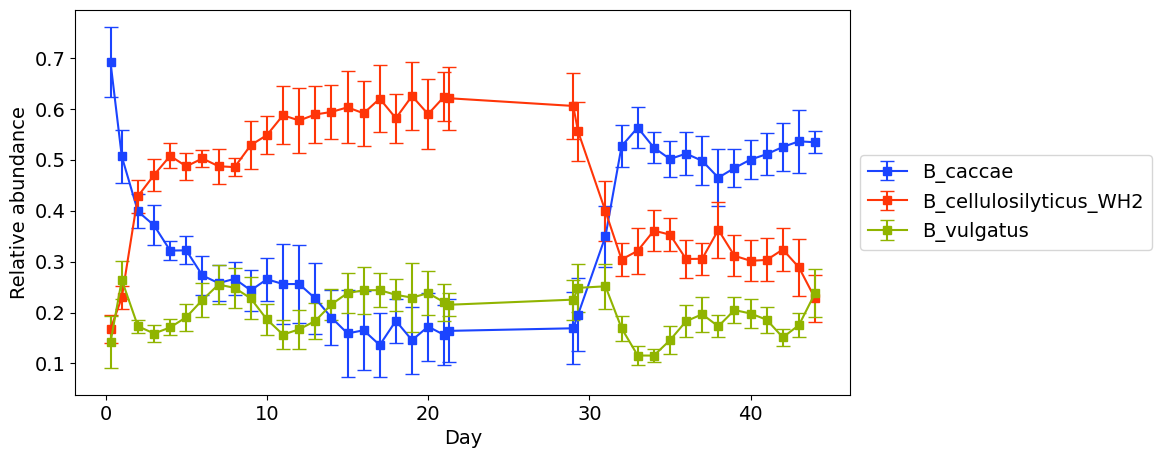

In [6]:
cmap3 = ['#1b44ffff', '#ff3508ff', '#90b400ff']
Species = ['B_caccae', 'B_cellulosilyticus_WH2', 'B_vulgatus']
plt.figure(figsize=(10, 5))
c=0
for s in Species:
    plt.errorbar(relative_abundance_mean_for_plot[relative_abundance_mean_for_plot['Species'] == s]['Day'],
                    relative_abundance_mean_for_plot[relative_abundance_mean_for_plot['Species'] == s]['Relative_abundance'],
                    yerr=relative_abundance_std_for_plot[relative_abundance_std_for_plot['Species'] == s]['Relative_abundance'],
                    fmt='s', capsize=5, label=s, linestyle='-', color=cmap3[c])
    c+=1
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc=0)
plt.xlabel('Day')
plt.ylabel('Relative abundance')
plt.show()

In [7]:
dna_yields = pd.read_excel('reyes-datasets/Reyes_dataExp2_source.xlsx', sheet_name='DNA_yields')
dna_yields = dna_yields.melt(id_vars=['Day'], var_name='Mouse', value_name='DNA_yields')
dna_yields['Mouse'] = dna_yields['Mouse'].str.replace('M', '').astype(int)
dna_yields

,Day,Mouse,DNA_yields
0,0.3,1,11.516241
1,1.0,1,125.019172
2,2.0,1,437.416874
3,3.0,1,352.361727
4,4.0,1,436.468030
...,...,...,...
268,40.0,12,592.370535
269,41.0,12,781.101560
270,42.0,12,481.996816
271,43.0,12,672.499204


In [8]:
dna_yields_mean_for_plot = dna_yields.loc[:, ['Day', 'DNA_yields']]. \
    groupby(['Day']). \
    mean(). \
    reset_index()
dna_yields_mean_for_plot

,Day,DNA_yields
0,0.3,13.123591
1,1.0,212.270833
2,2.0,502.543601
3,3.0,440.825285
4,4.0,703.473081
5,5.0,633.654979
6,6.0,819.683771
7,7.0,1087.189573
8,8.0,861.663553
9,9.0,904.366160


In [9]:
dna_yields_std_for_plot = dna_yields.loc[:, ['Day', 'DNA_yields']]. \
    groupby(['Day']). \
    std(). \
    reset_index()
dna_yields_std_for_plot

,Day,DNA_yields
0,0.3,10.865671
1,1.0,71.866379
2,2.0,225.143828
3,3.0,132.292756
4,4.0,145.528614
5,5.0,168.292478
6,6.0,155.508593
7,7.0,304.272189
8,8.0,362.339664
9,9.0,237.803259


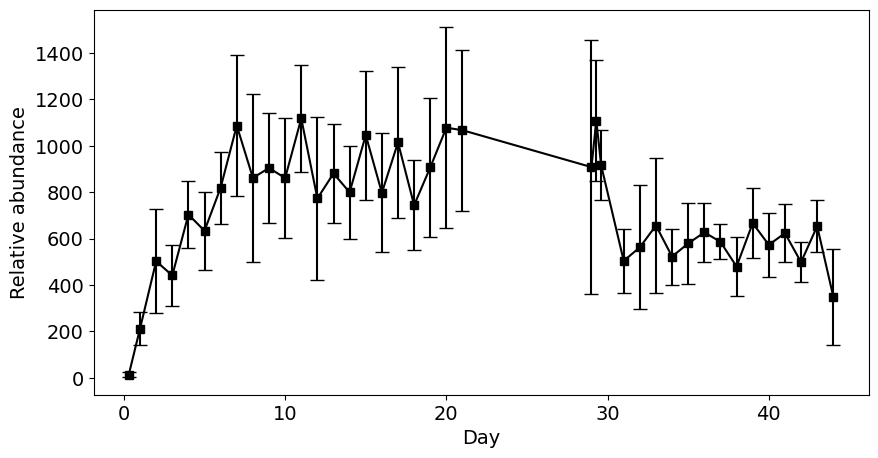

In [10]:
plt.figure(figsize=(10, 5))
plt.errorbar(dna_yields_mean_for_plot['Day'],
                dna_yields_mean_for_plot['DNA_yields'],
                yerr=dna_yields_std_for_plot['DNA_yields'],
                fmt='s', capsize=5, linestyle='-', color='k')
plt.xlabel('Day')
plt.ylabel('Relative abundance')
plt.show()

In [11]:
genome_size = pd.read_excel('reyes-datasets/Reyes_dataExp2_source.xlsx', sheet_name='Genome_size', index_col=0)
genome_size

,Genome_length
Species,
B_caccae,4564814
B_cellulosilyticus_WH2,7082128
B_vulgatus,5163189


In [12]:
N_A = 6.02214076e23 # Avogadro's number
dsDNA_bp = 660 # Average mass of a DNA bp (g/mol)
unit_conversion = 1e6 # Convert from ug to g
# unit_conversion = 1e9 # Convert from ng to g
conversion_factor = N_A/(dsDNA_bp*unit_conversion)
conversion_factor

912445569696969.6

In [13]:
master_table = pd.merge(relative_abundance, genome_size, on='Species')
master_table = pd.merge(master_table, dna_yields, on=['Mouse', 'Day'])
master_table['Day'] = master_table['Day'].replace(0.3, 0)
master_table['Absolute_abundance'] = ((master_table['Relative_abundance']*master_table['DNA_yields'])/master_table['Genome_length'])*conversion_factor
master_table.dropna(inplace=True)
master_table = master_table.loc[:, ['Day', 'Species', 'Absolute_abundance']]
master_table

,Day,Species,Absolute_abundance
0,0.0,B_cellulosilyticus_WH2,2.793485e+08
1,0.0,B_caccae,1.420455e+09
2,0.0,B_vulgatus,3.961596e+08
3,1.0,B_cellulosilyticus_WH2,3.736692e+09
4,1.0,B_caccae,1.205983e+10
...,...,...,...
793,43.0,B_caccae,8.480705e+10
794,43.0,B_vulgatus,1.917977e+10
795,44.0,B_cellulosilyticus_WH2,4.946887e+09
796,44.0,B_caccae,1.906341e+10


In [14]:
master_table_mean = master_table.groupby(['Day', 'Species']).mean().reset_index()
master_table_mean

,Day,Species,Absolute_abundance
0,0.0,B_caccae,1.762020e+09
1,0.0,B_cellulosilyticus_WH2,2.964405e+08
2,0.0,B_vulgatus,3.547882e+08
3,1.0,B_caccae,2.114932e+10
4,1.0,B_cellulosilyticus_WH2,6.322131e+09
...,...,...,...
109,43.0,B_cellulosilyticus_WH2,2.436759e+10
110,43.0,B_vulgatus,2.027301e+10
111,44.0,B_caccae,3.719805e+10
112,44.0,B_cellulosilyticus_WH2,1.103504e+10


In [15]:
master_table_mean_pivot = master_table_mean.pivot(index='Day', columns='Species', values='Absolute_abundance')
master_table_mean_pivot.columns.name = None
master_table_mean_pivot

,B_caccae,B_cellulosilyticus_WH2,B_vulgatus
Day,,,
0.0,1.762020e+09,2.964405e+08,3.547882e+08
1.0,2.114932e+10,6.322131e+09,1.014271e+10
2.0,4.099073e+10,2.724908e+10,1.519355e+10
3.0,3.319247e+10,2.658016e+10,1.209864e+10
4.0,4.490986e+10,4.622699e+10,2.120595e+10
5.0,4.031648e+10,3.965245e+10,2.194666e+10
6.0,4.498029e+10,5.309711e+10,3.225713e+10
7.0,5.682434e+10,6.880889e+10,4.750851e+10
8.0,4.691671e+10,5.423090e+10,3.640866e+10


In [16]:
master_table_std = master_table.groupby(['Day', 'Species']).std().reset_index()
master_table_std

,Day,Species,Absolute_abundance
0,0.0,B_caccae,1.402984e+09
1,0.0,B_cellulosilyticus_WH2,2.604020e+08
2,0.0,B_vulgatus,3.780655e+08
3,1.0,B_caccae,6.061993e+09
4,1.0,B_cellulosilyticus_WH2,2.359630e+09
...,...,...,...
109,43.0,B_cellulosilyticus_WH2,6.648336e+09
110,43.0,B_vulgatus,4.533104e+09
111,44.0,B_caccae,2.187921e+10
112,44.0,B_cellulosilyticus_WH2,8.489824e+09


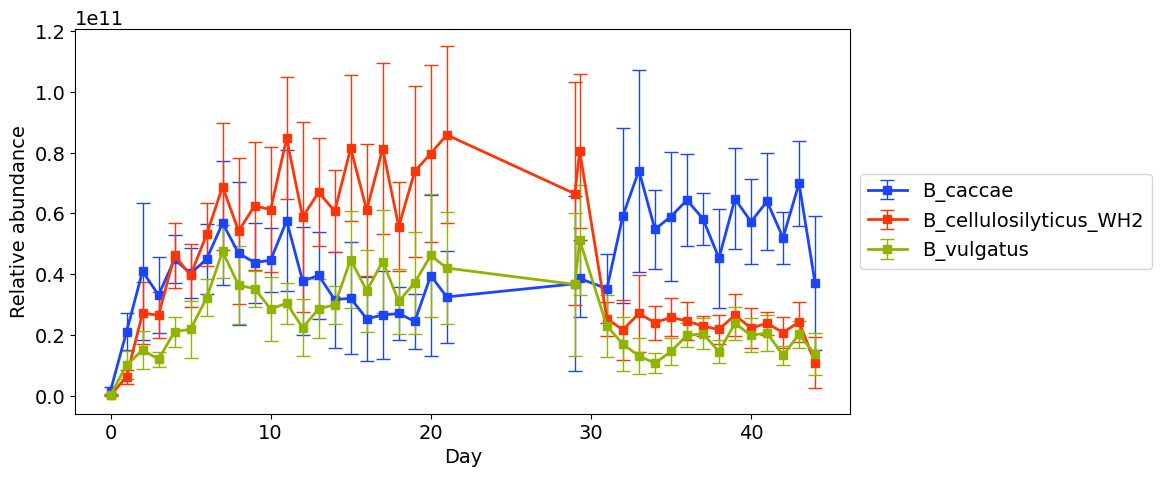

In [17]:
cmap3 = ['#1b44ffff', '#ff3508ff', '#90b400ff']
Species = ['B_caccae', 'B_cellulosilyticus_WH2', 'B_vulgatus']
plt.figure(figsize=(10, 5))
c=0
for s in Species:
    plt.errorbar(master_table_mean[master_table_mean['Species'] == s]['Day'],
                    master_table_mean[master_table_mean['Species'] == s]['Absolute_abundance'],
                    yerr=master_table_std[master_table_std['Species'] == s]['Absolute_abundance'],
                    fmt='s', capsize=5, label=s, linestyle='-', elinewidth=1, color=cmap3[c], markeredgewidth=1, linewidth=2)
    c+=1
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Day')
plt.ylabel('Relative abundance')
# plt.yscale('log')
plt.show()

# Forward Simulate

## LF0 parameters

In [18]:
growth = np.load('mcnulty-results/mcnulty-LF0-seed96/posteriors/growth.npy')
interactions = np.load('mcnulty-results/mcnulty-LF0-seed96/posteriors/interactions.npy')
perturbations = np.load('mcnulty-results/mcnulty-LF0-seed96/posteriors/perturbations.npz')['HF/HS']
perturbations_start = [30]
perturbations_end = [44]
dt = 0.01
start_time = 0
n_days = 44
initial_conditions = pd.read_table('mcnulty-results/mcnulty-LF0-seed96/initial_abundances.tsv', header=None, index_col=0).values

In [19]:
base = []

for i in range(0, growth.shape[0], 20):
    initial_conditions_ex = initial_conditions.copy()
#
    initial_conditions_ex[0,0] = master_table_mean_pivot.loc[0, 'B_caccae']
    initial_conditions_ex[1,0] = master_table_mean_pivot.loc[0, 'B_cellulosilyticus_WH2']
    initial_conditions_ex[5,0] = master_table_mean_pivot.loc[0, 'B_vulgatus']
# 
    initial_conditions_ex[2,0] = 0
    initial_conditions_ex[3,0] = 0
    initial_conditions_ex[4,0] = 0
    initial_conditions_ex[6,0] = 0
    initial_conditions_ex[7,0] = 0
    initial_conditions_ex[8,0] = 0
    initial_conditions_ex[9,0] = 0
    initial_conditions_ex[10,0] = 0
    dyn = md2.model.gLVDynamicsSingleClustering(
        growth=growth[i],
        interactions=interactions[i],
        perturbations=[perturbations[i]],
        perturbation_starts=perturbations_start,
        perturbation_ends=perturbations_end,
        start_day=start_time
        )
    x = md2.integrate(
        dynamics=dyn,
        initial_conditions=initial_conditions_ex,
        dt=dt,
        n_days=n_days + dt,
        subsample=False
    )
    base.append(x['X'])

base = np.array(base)
times = x['times']

base_mean = base.mean(axis=0)
base_std = base.std(axis=0)

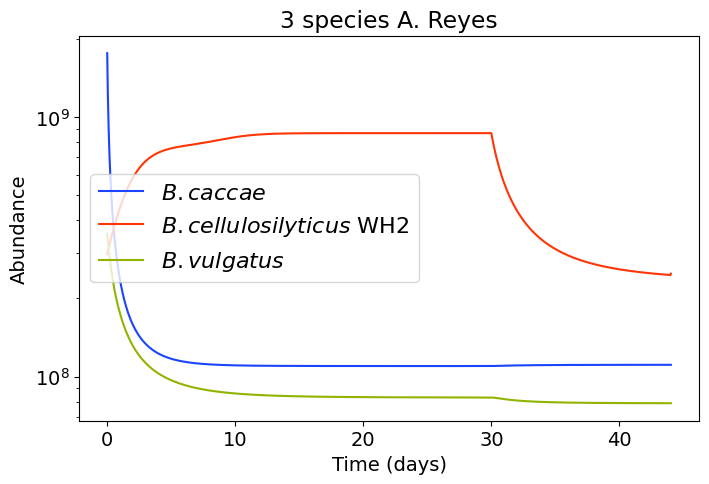

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(times, base_mean[0], label='$B. caccae$', lw=1.5, c=cmap3[0])
ax.plot(times, base_mean[1], label='$B. cellulosilyticus$ WH2', lw=1.5, c=cmap3[1])
ax.plot(times, base_mean[5], label='$B. vulgatus$', lw=1.5, c=cmap3[2])
ax.legend(fontsize=16)
ax.set_yscale('log')
# ax.set_ylim([8e6,2e9])
ax.set_title('3 species A. Reyes')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Abundance')
# fig.savefig('mcnulty-results/mcnulty-LF0-seed96/keystoneness-individual/trajectories.svg', bbox_inches='tight')
plt.show()

## HF0 parameters

In [21]:
growth = np.load('mcnulty-results/mcnulty-HF0-seed12/posteriors/growth.npy')
interactions = np.load('mcnulty-results/mcnulty-HF0-seed12/posteriors/interactions.npy')
perturbations = np.load('mcnulty-results/mcnulty-HF0-seed12/posteriors/perturbations.npz')['LF/HPP']
perturbations_start = [0]
perturbations_end = [30]
dt = 0.01
start_time = 0
n_days = 44
initial_conditions = pd.read_table('mcnulty-results/mcnulty-LF0-seed96/initial_abundances.tsv', header=None, index_col=0).values

In [22]:
base = []

for i in range(0, growth.shape[0], 20):
    initial_conditions_ex = initial_conditions.copy()
#
    initial_conditions_ex[0,0] = master_table_mean_pivot.loc[0, 'B_caccae']
    initial_conditions_ex[1,0] = master_table_mean_pivot.loc[0, 'B_cellulosilyticus_WH2']
    initial_conditions_ex[5,0] = master_table_mean_pivot.loc[0, 'B_vulgatus']
# 
    initial_conditions_ex[2,0] = 0
    initial_conditions_ex[3,0] = 0
    initial_conditions_ex[4,0] = 0
    initial_conditions_ex[6,0] = 0
    initial_conditions_ex[7,0] = 0
    initial_conditions_ex[8,0] = 0
    initial_conditions_ex[9,0] = 0
    initial_conditions_ex[10,0] = 0
    dyn = md2.model.gLVDynamicsSingleClustering(
        growth=growth[i],
        interactions=interactions[i],
        perturbations=[perturbations[i]],
        perturbation_starts=perturbations_start,
        perturbation_ends=perturbations_end,
        start_day=start_time
        )
    x = md2.integrate(
        dynamics=dyn,
        initial_conditions=initial_conditions_ex,
        dt=dt,
        n_days=n_days + dt,
        subsample=False
    )
    base.append(x['X'])

base = np.array(base)
times = x['times']

base_mean = base.mean(axis=0)
base_std = base.std(axis=0)

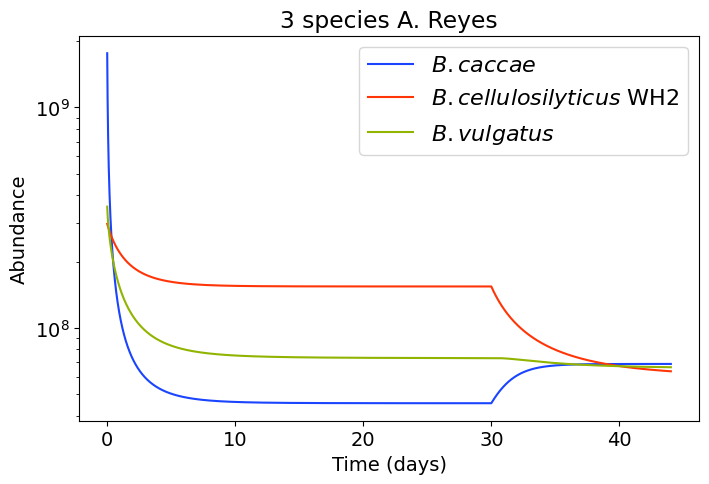

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(times, base_mean[0], label='$B. caccae$', lw=1.5, c=cmap3[0])
ax.plot(times, base_mean[1], label='$B. cellulosilyticus$ WH2', lw=1.5, c=cmap3[1])
ax.plot(times, base_mean[5], label='$B. vulgatus$', lw=1.5, c=cmap3[2])
ax.legend(fontsize=16)
ax.set_yscale('log')
# ax.set_ylim([8e6,2e9])
ax.set_title('3 species A. Reyes')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Abundance')
# fig.savefig('mcnulty-results/mcnulty-HF0-seed12/keystoneness-individual/trajectories.svg', bbox_inches='tight')
plt.show()